# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [1]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Problem-1

How many samples does the dataset have?

In [2]:
# Enter your solution here
num = X.shape[0]
print(num)

100


## Problem-2

How many features does the dataset have?

In [3]:
# Enter your solution here
X.shape[1]

784

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

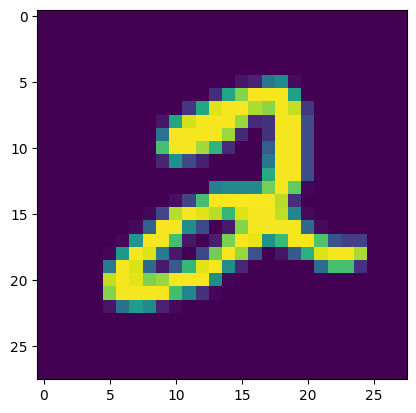

In [4]:
# Enter your solution here
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28, 28))

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [6]:
# Enter your solution here
X_prime = X - np.mean(X, axis=0)
print(np.mean(X_prime))

3.2481953634747437e-16


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [7]:
# Enter your solution here
C = np.cov(X_prime.T)
print(np.mean(C))

94.1069883182092


In [21]:
C

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [11]:
# Enter your solution here
w1 = np.linalg.eig(C)[1][:, 0]
w2 = np.linalg.eig(C)[1][:, 1]
w = w1 + w2
print(np.sum(w))

(1.0516243880598384+0j)


## Problem-7

Visualize the first principal component as an image.

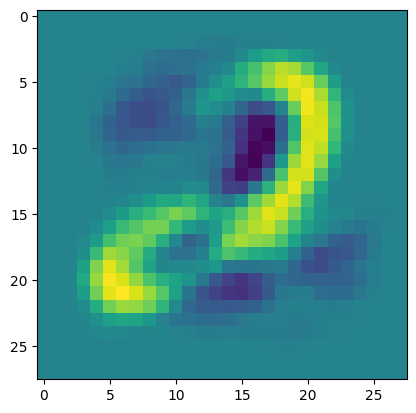

In [13]:
# Enter your solution here
plt.imshow(w1.reshape(28, 28).real)

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [15]:
# Enter your solution here
total = np.sum(np.linalg.eig(C)[0])
for i in range(1, 785):
  if np.sum(np.linalg.eig(C)[0][:i]) / total >= 0.95:
    print(i)
    break

53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



In [17]:
def get_k(variance):
  total = np.sum(np.linalg.eig(C)[0])
  for i in range(1, 785):
    if np.sum(np.linalg.eig(C)[0][:i]) / total >= variance:
      return i

Plot number :  1
Plot number :  2
Plot number :  3
Plot number :  4


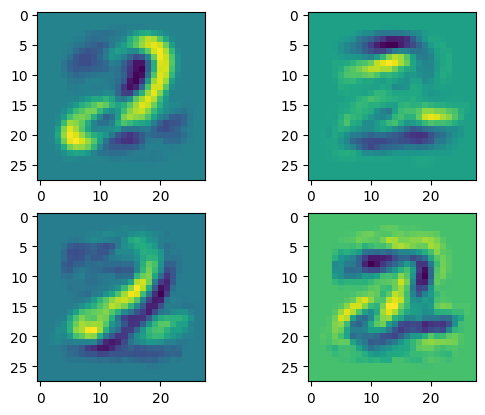

In [20]:
# Enter your solution here
k_20 = get_k(0.2)
k_50 = get_k(0.5)
k_80 = get_k(0.8)
k_95 = get_k(0.95)

k=[]

k.append(k_20)
k.append(k_50)
k.append(k_80)
k.append(k_95)

# plt.subplot(2, 2, 1)
for i in range(4):
  print("Plot number : ", i + 1)
  plt.subplot(2, 2, i + 1)
  plt.imshow(k[i] * np.linalg.eig(C)[1][:, i].reshape(28, 28).real)